## Importing Data Set

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [46]:
df_raw=pd.read_csv(r"C:\Users\92330\OneDrive\Desktop\Faraz\JupyterProjects\Marketing_AB.csv")


In [47]:
df_raw.head(10)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
5,5,1137664,ad,False,734,Saturday,10
6,6,1116205,ad,False,264,Wednesday,13
7,7,1496843,ad,False,17,Sunday,18
8,8,1448851,ad,False,21,Tuesday,19
9,9,1446284,ad,False,142,Monday,14


## Data Exploration 

#####  I remove the first column from the DataFrame as it doesn't contain the data I need. Then, I check the DataFrame's information to understand data types, column names, and dataset size with info() function of python. I used describe() function to show a variety of key stats all at once. we can use the min() and max() functions together to compute the range of our data and mean() and median() to detect outliers

In [48]:
df=df_raw.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [49]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user id,588101.0,NaN,NaN,NaN,1310692.215793,202225.983128,900000.0,1143190.0,1313725.0,1484088.0,1654483.0
test group,588101,2,ad,564577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
converted,588101,2,False,573258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total ads,588101.0,NaN,NaN,NaN,24.820876,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads day,588101,7,Friday,92608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most ads hour,588101.0,NaN,NaN,NaN,14.469061,4.834634,0.0,11.0,14.0,18.0,23.0


In [50]:
df.shape

(588101, 6)

In [51]:
df.nunique()

user id          588101
test group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

In [52]:
df.isnull().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
df[df["user id"].duplicated()].count()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [55]:
# Checking Groups
df['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [56]:
# Checking Convertions (True= Purchase, False= Didn't Purchase)
df['converted'].unique()

array([False,  True])

In [57]:
# Days of running campaign
sorted(df['most ads day'].unique())

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [58]:
# Exploring each groups' value counts
df['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

In [59]:
# Normalizing Group value counts
df['test group'].value_counts(normalize=True)

test group
ad     0.96
psa    0.04
Name: proportion, dtype: float64

###### Comments: A large group of participants was selected for the experimental group, while a smaller group served as the control group, 4% of participants were assigned to the control group (seeing a PSA), and the remaining 96% were in the experimental group (exposed to the ad).

In [60]:
# Exploring Purchase vs Didn't Purchase value counts
df['converted'].value_counts()

converted
False    573258
True      14843
Name: count, dtype: int64

In [61]:
# Normalizing Purchase vs Didn't Purchase counts
df['converted'].value_counts(normalize=True)

converted
False    0.974761
True     0.025239
Name: proportion, dtype: float64

###### Interestingly, the data shows that only 3% of the population has already purchased from the company, with 97% not making a purchase. However, it's important to note that this doesn't necessarily reflect the effectiveness of the advertising campaign yet

## Statistical Data Analysis

In [62]:
df.groupby('test group')['converted'].value_counts()

test group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: count, dtype: int64

In [63]:
df.groupby('test group')['converted'].value_counts(normalize=True)

test group  converted
ad          False        0.974453
            True         0.025547
psa         False        0.982146
            True         0.017854
Name: proportion, dtype: float64

In [75]:
#saving this grouping for pie chart data
catdata = df.groupby('test group')['converted'].value_counts(normalize=True)

In [83]:
cat_ad = catdata['ad']
cat_psa = catdata['psa']

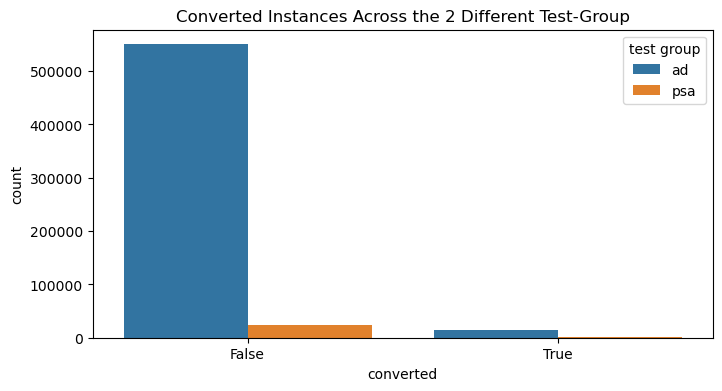

In [64]:
plt.figure(figsize=(8, 4), dpi=100)
sns.countplot(data=df, x='converted', hue='test group')
plt.title('Converted Instances Across the 2 Different Test-Group')


plt.show()

###### Comments: Large number of ads had no conversions and extremely few number of psa had conversions

Text(0.5, 1.0, 'Conversion of psa')

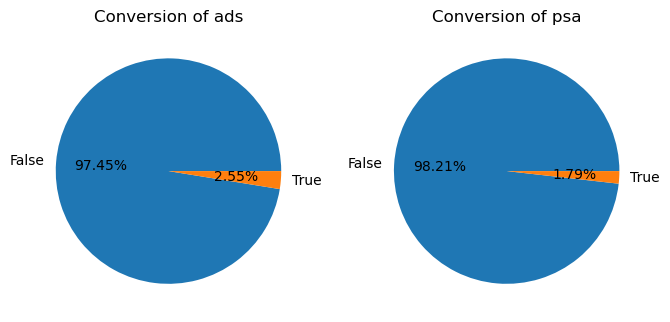

In [95]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.pie(cat_ad, labels=cat_ad.index, autopct ='%0.2f%%')
plt.title('Conversion of ads')

plt.subplot(1,2,2)
plt.pie(cat_psa, labels=cat_psa.index, autopct ='%0.2f%%')
plt.title('Conversion of psa')

###### Comments: Conversions of ads vs psa shows both performed poorly with very little affect (ads had slightly better conversion rate)

<Axes: xlabel='converted', ylabel='total ads'>

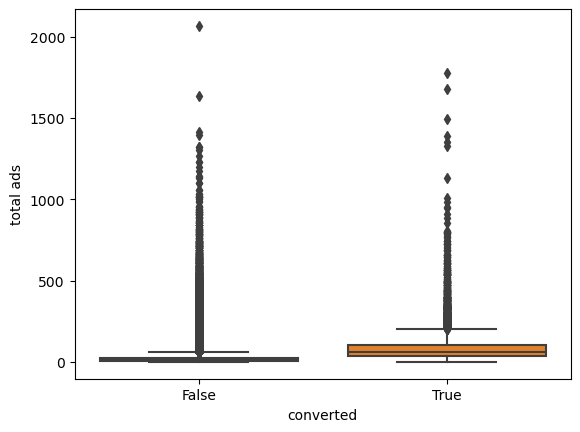

In [65]:
sns.boxplot(x= 'converted' , y= 'total ads' , data =df)

<Axes: xlabel='converted', ylabel='total ads'>

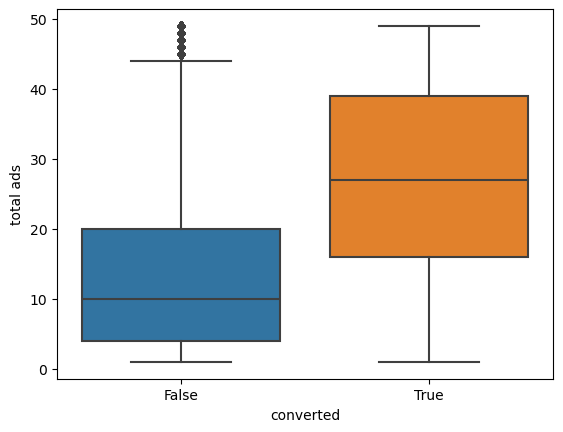

In [66]:
sns.boxplot(x= 'converted' , y= 'total ads' , data = df[df['total ads'] <50])

###### Comments: on a sample of 50, box plot shows there is definitely a relationship of ads shown with convertion rate

## Hypothesis testing

###### I want to answer this question: "Will the advertising campaign be successful?"

###### To assess this, I'll compare conversion rates (bought/not bought) between the two test groups (ad and psa). Since we have two independent groups, we can use a two-sample hypothesis test

###### Then I apply central limit theoram for sampling.  I will create a random sample of 5,000 from the data set and obtain a mean by sampling n=5000. Then looping this process 10,000 times and obtainting 10,000 estimate points for mean of both  groups. 

In [96]:
group_ad=df[df['test group']=='ad']
group_psa=df[df['test group']=='psa']

In [97]:
group_ad['converted'].mean()

0.025546559636683747

In [98]:
group_psa['converted'].mean()

0.01785410644448223

In [99]:
estimate_list_ad = []
for i in range(10000):
    estimate_list_ad.append(group_ad['converted'].sample(n=5000,replace=True).mean())

In [100]:
estimate_df_ad = pd.DataFrame(data={'estimate': estimate_list_ad})
estimate_df_ad

,estimate
0,0.0266
1,0.0262
2,0.0252
3,0.0230
4,0.0308
...,...
9995,0.0282
9996,0.0228
9997,0.0246
9998,0.0240


In [101]:
estimate_list_psa = []
for i in range(10000):
    estimate_list_psa.append(group_psa['converted'].sample(n=5000,replace=True).mean())

In [102]:
estimate_df_psa = pd.DataFrame(data={'estimate': estimate_list_psa})
estimate_df_psa

,estimate
0,0.0170
1,0.0196
2,0.0212
3,0.0142
4,0.0202
...,...
9995,0.0192
9996,0.0196
9997,0.0200
9998,0.0194


In [103]:
estimate_df_ad.mean()

estimate    0.025516
dtype: float64

In [104]:
estimate_df_psa.mean()

estimate    0.017869
dtype: float64

###### The central limit theorem assures us that, even if the original data isn't normally distributed, the means of sufficiently large samples will be approximately normally distributed around the population mean. According to the central limit theorem, the mean of the preceding sampling distribution should be roughly equal to the population mean.

###### This is evident here, as the sample means for the 'ad' group (0.025547) and the 'psa' group (0.017874) are very close to the population means (ad='0.025546559636683747' and psd = '0.01785410644448223').

###### Because of this, I can confidently use these samples in our t-test.

Text(0.5, 1.0, 'Distribution of means of sample for ADs')

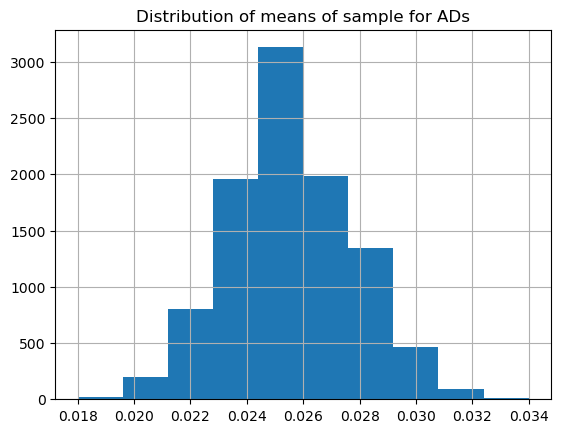

In [106]:
estimate_df_ad['estimate'].hist()
plt.title('Distribution of means of sample for ADs')

Text(0.5, 1.0, 'Distribution of means of sample for PSAs')

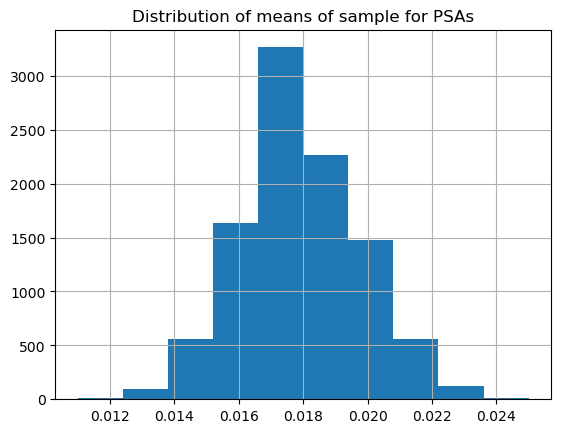

In [107]:
estimate_df_psa['estimate'].hist()
plt.title('Distribution of means of sample for PSAs')

###### Now that I have organized my data and simulated random sampling, I am ready to conduct my hypothesis test. I use two-sample t-test that it is the standard approach for comparing the means of two independent samples

###### In a two-sample t-test, the null hypothesis states that there is no difference between the purchases of your two groups. The alternative hypothesis states the contrary claim: there is a difference between the means of your two groups. The alpha value will be set to 0.05 by standard

##### Null Hypothesis (H₀): Advertising is not effective in increasing product purchases.

##### Alternative Hypothesis (Hₐ): Advertising is effective in increasing product purchases.

In [108]:
t_statistic, p_value = stats.ttest_ind(estimate_df_ad,estimate_df_psa,equal_var=False)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: [263.31188446]
P-value: [0.]


In [115]:
if p_value < 0.05:
    print('There is a statistically significant difference in the mean of the two groups, therefore reject Ho')
else:
    print('not a significant differnce, Null hypohesis')

There is a statistically significant difference in the mean of the two groups, therefore reject Ho


## Conclusion:
#### Reject or fail to reject the null hypothesis to draw a conclusion, I compared my p-value with the significance level. (p-value=0.0 < significant level=0.05)

#### The p-value is less than the significance level, I can conclude that there is a statistically significant difference in the mean two gorup of campaign and the campaign is effective on customer purchases. In other words, I will reject the null hypothesis H0.
    
